# Plot diagrams


In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
metric_file_path = "../runs/metrics.txt"

In [11]:
metric_file = open(metric_file_path, "r")
content = metric_file.read().replace("\n", "").replace("}{", "},{")
entries = json.loads("[" + content + "]")
print(f"Read {len(entries)} entries")

Read 160 entries


In [31]:
def number_to_string(value):
    if value == value: # NaN
        return str(int(value))
    else:
        return "All"

df = pd.DataFrame.from_records(entries)
df["number_of_samples"] = df["number_of_samples"].apply(number_to_string)
df

,model_name,feature_identifier,number_of_samples,accuracy,balanced_accuracy,f1_weighted,f1_micro,f1_macro
0,lr,../datasets/intermediate-features/Cassava_Mini...,1,0.360465,0.209489,0.378570,0.360465,0.168279
1,knn,../datasets/intermediate-features/Cassava_Mini...,1,0.383721,0.217036,0.397279,0.383721,0.175148
2,lr,../datasets/intermediate-features/Cassava_Mini...,3,0.267442,0.250942,0.311122,0.267442,0.203578
3,knn,../datasets/intermediate-features/Cassava_Mini...,3,0.348837,0.265809,0.400359,0.348837,0.230587
4,lr,../datasets/intermediate-features/Cassava_Mini...,10,0.279070,0.254293,0.325614,0.279070,0.200639
...,...,...,...,...,...,...,...,...
155,knn,../datasets/intermediate-features/Cassava_Mini...,10,0.232558,0.227974,0.278770,0.232558,0.187477
156,lr,../datasets/intermediate-features/Cassava_Mini...,30,0.302326,0.290128,0.346754,0.302326,0.237136
157,knn,../datasets/intermediate-features/Cassava_Mini...,30,0.250000,0.185278,0.292779,0.250000,0.165540
158,lr,../datasets/intermediate-features/Cassava_Mini...,All,0.604651,0.304559,0.560251,0.604651,0.293604


In [34]:
group = df.groupby(["model_name", "feature_identifier"])
for (model_name, feature_identifier), values in group:
    values.set_index("number_of_samples", inplace=True)
    print(values)
    break
    # print(f"model_name={model_name}, feature_identifier={feature_identifier} group={type(values)}")
    # print(name.keys())
    # if("knn" in name):
    #     print("knn")

                  model_name  \
number_of_samples              
1                        knn   
3                        knn   
10                       knn   
30                       knn   
All                      knn   

                                                  feature_identifier  \
number_of_samples                                                      
1                  ../datasets/intermediate-features/Cassava_Mini...   
3                  ../datasets/intermediate-features/Cassava_Mini...   
10                 ../datasets/intermediate-features/Cassava_Mini...   
30                 ../datasets/intermediate-features/Cassava_Mini...   
All                ../datasets/intermediate-features/Cassava_Mini...   

                   accuracy  balanced_accuracy  f1_weighted  f1_micro  \
number_of_samples                                                       
1                  0.383721           0.217036     0.397279  0.383721   
3                  0.348837           0.265809     

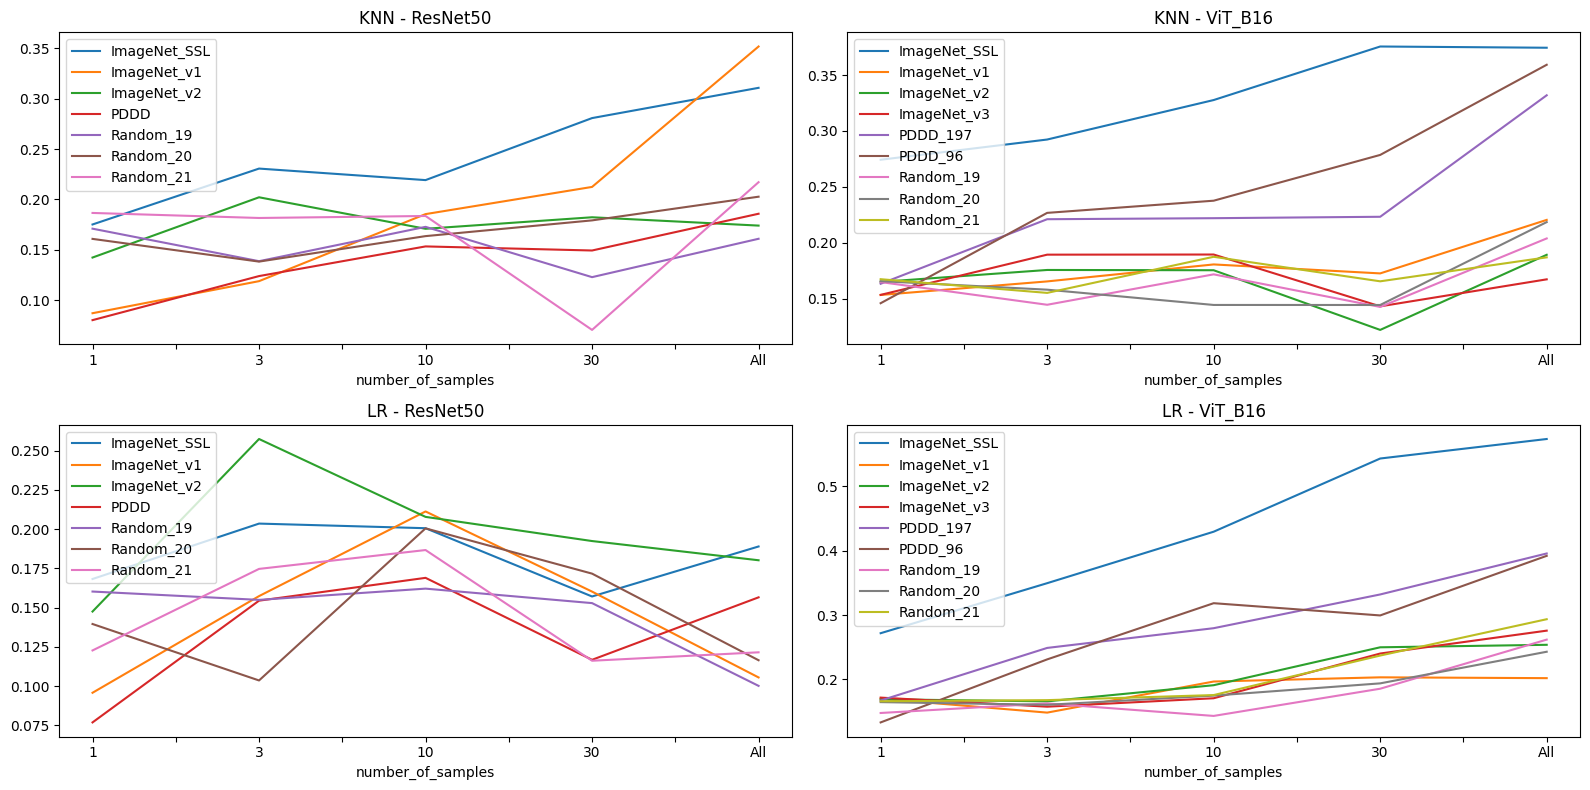

In [51]:
def get_wrapped_substring(whole_string, start_string, end_string):
    start = whole_string.index(start_string)
    end = whole_string.index(end_string)
    return whole_string[start+len(start_string):end]

group = df.groupby(["model_name", "feature_identifier"])

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0][0].set_title(f"KNN - ResNet50")
ax[0][1].set_title(f"KNN - ViT_B16")
ax[1][0].set_title(f"LR - ResNet50")
ax[1][1].set_title(f"LR - ViT_B16")

row = None
column = None

for (model_name, feature_identifier), values in group:
    values.set_index("number_of_samples", inplace=True)
    if "knn" == model_name:
        row = 0
    elif "lr" == model_name:
        row = 1
    else:
        print(f"Unknown model_name: {model_name}")
        continue

    if "Cassava_Mini-ResNet50" in feature_identifier:
        column = 0
        label = get_wrapped_substring(feature_identifier, "ResNet50-", ".csv")
    elif "Cassava_Mini-ViT_B16" in feature_identifier:
        column = 1
        label = get_wrapped_substring(feature_identifier, "ViT_B16-", ".csv")
    else:
        print(f"Unknown feature_identifier: {feature_identifier}")
        continue

    values.plot.line(
        ax=ax[row][column],
        y=["f1_macro"],
        # x=["number_of_samples"],
        label=[label],
        # logy=logy
        # NOTE: index is x-axis as default
    )
    # ax[row][column].get_legend().remove()

# plt.title('Scatter plot', y=-0.01)
# ax[0].set_axis_off()
# ax[0].imshow(img, cmap="gray")

# ax[1].set_title(f"2")
# ax[1].plot([0,1,2,3],[0,1,2,3], color='g', label="green")
# ax[1].plot([0,1,2,3],[-1,0.5,2,3.5], color='b', label="blue")
# ax[1].plot([0,1,2,3],[-2,0,2,4], color='r', label="red")
# ax[1].set_axis_off()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

In [2]:
# ResNet Random_19 (K=1): 0.07036247334754797
# ResNet Random_20 (K=1): 0.053304904051172705
# ResNet Random_21 (K=1): 0.07462686567164178
# ResNet ImageNet_v1 (K=1): 0.15565031982942432
# ResNet ImageNet_v2 (K=1): 0.10660980810234541
# ResNet PDDD (K=1): 0.18976545842217485

# Swin_T Random_19 (K=1): 0.06823027718550106
# Swin_T Random_20 (K=1): 0.0767590618336887
# Swin_T Random_21 (K=1): 0.05543710021321962
# Swin_T ImageNet (K=1): 0.39872068230277186
# Swin_T PDDD (K=1): 0.2579957356076759

# ResNet Random_19: 0.0021321961620469083
# ResNet Random_20: 0.01279317697228145
# ResNet Random_21: 0.008528784648187633 ???
# ResNet ImageNet_v1: 0.008528784648187633 ???
# ResNet ImageNet_v2: 0.07889125799573561
# ResNet PDDD: 0.14285714285714285

# Swin_T Random_19: 0.1023454157782516
# Swin_T Random_20: 0.10660980810234541
# Swin_T Random_21: 0.12366737739872068
# Swin_T ImageNet: 0.5778251599147122
# Swin_T PDDD: 0.3411513859275053

x_values_random = [
    "KNN ResNet50",
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "KNN Swin-T",
    "KNN Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
]
y_values_random = [
    0.07036247334754797,
    0.053304904051172705,
    0.07462686567164178,
    0.0021321961620469083,
    0.01279317697228145,
    0.008528784648187633,
    0.06823027718550106,
    0.0767590618336887,
    0.05543710021321962,
    0.1023454157782516,
    0.10660980810234541,
    0.12366737739872068,
]
x_values_imagenet = [
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_imagenet = [
    0.15565031982942432,
    0.10660980810234541,
    0.008528784648187633,
    0.07889125799573561,
    0.39872068230277186,
    0.5778251599147122,
]
x_values_pddd = [
    "KNN ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_pddd = [
    0.18976545842217485,
    0.14285714285714285,
    0.2579957356076759,
    0.3411513859275053,
]

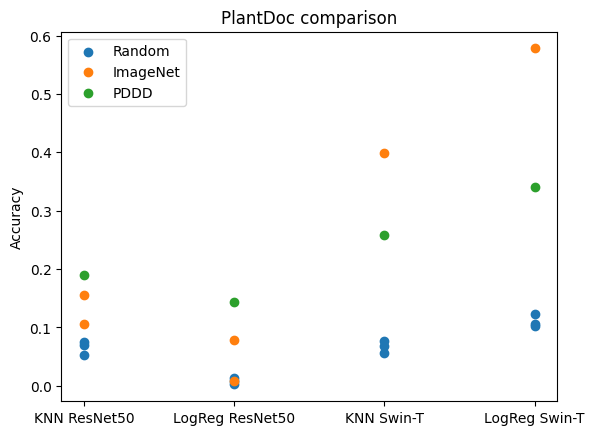

In [3]:
plt.scatter(x_values_random, y_values_random)
plt.scatter(x_values_imagenet, y_values_imagenet)
plt.scatter(x_values_pddd, y_values_pddd)
plt.gca().set_ylabel("Accuracy")  # gca = get current axes
plt.legend(["Random", "ImageNet", "PDDD"])
plt.title("PlantDoc comparison")
plt.show()

In [6]:
x_values_random = [
    "KNN ResNet50",
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "KNN Swin-T",
    "KNN Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
]
y_values_random = [
    0.446064139941691,
    0.43440233236151604,
    0.43440233236151604,
    0.2944606413994169,
    0.32653061224489793,
    0.40233236151603496,
    0.45481049562682213,
    0.36151603498542273,
    0.40233236151603496,
    0.5451895043731778,
    0.4752186588921283,
    0.4956268221574344,
]
x_values_imagenet = [
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_imagenet = [
    0.5714285714285714,
    0.565597667638484,
    0.2565597667638484,
    0.4897959183673469,
    0.5830903790087464,
    0.7346938775510204,
]
x_values_pddd = [
    "KNN ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_pddd = [
    0.4752186588921283,
    0.42565597667638483,
    0.6122448979591837,
    0.6384839650145773,
]

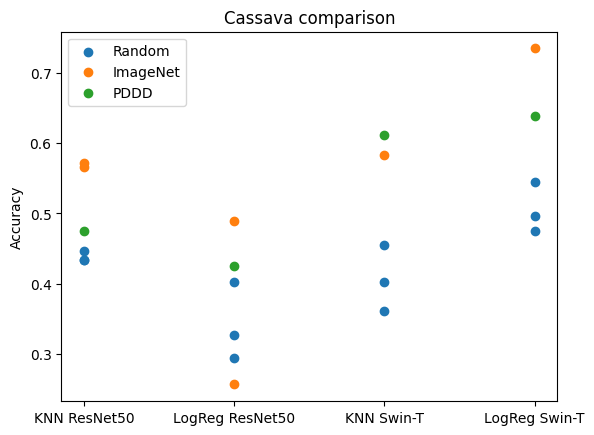

In [7]:
plt.scatter(x_values_random, y_values_random)
plt.scatter(x_values_imagenet, y_values_imagenet)
plt.scatter(x_values_pddd, y_values_pddd)
plt.gca().set_ylabel("Accuracy")  # gca = get current axes
plt.legend(["Random", "ImageNet", "PDDD"])
plt.title("Cassava comparison")
plt.show()